In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('googleplaystore.csv')

In [3]:
df.sample(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8953,US DV Lottery 2020 Apply,TRAVEL_AND_LOCAL,4.6,41,2.0M,"10,000+",Free,0,Everyone,Travel & Local,"January 14, 2018",1.02,4.0 and up
1672,Block Puzzle Classic Legend !,GAME,4.2,17039,4.9M,"5,000,000+",Free,0,Everyone,Puzzle,"April 13, 2018",2.9,2.3.3 and up
687,Girls Live Chat - Free Text & Video Chat,DATING,4.8,110,4.9M,"10,000+",Free,0,Mature 17+,Dating,"July 9, 2018",8.2,4.0.3 and up
1220,Cookbook Recipes,FOOD_AND_DRINK,4.1,46539,Varies with device,"5,000,000+",Free,0,Teen,Food & Drink,"July 23, 2018",Varies with device,Varies with device
6784,Ultimate Control BT,BUSINESS,4.6,14,4.3M,500+,Free,0,Everyone,Business,"June 6, 2018",3.3.2,4.4 and up
6029,Live Radio BD,FAMILY,4.2,69,3.5M,"10,000+",Free,0,Everyone,Entertainment,"May 4, 2015",1.1,4.0 and up
5237,Hey AJ! It's Saturday!,BOOKS_AND_REFERENCE,5.0,12,50M,100+,Paid,$3.99,Everyone,Books & Reference,"June 13, 2016",1.0.0,2.2 and up
1812,Hero Hunters,GAME,4.4,70747,99M,"5,000,000+",Free,0,Teen,Action,"July 31, 2018",1.7,4.4 and up
3454,Google Drive,PRODUCTIVITY,4.4,2731171,Varies with device,"1,000,000,000+",Free,0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
6915,Learn SAP BW on HANA,BOOKS_AND_REFERENCE,NaN,0,13M,500+,Free,0,Everyone,Books & Reference,"February 13, 2018",1.1,4.0 and up


# Preprocessing

In [4]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [5]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
df.columns

Index(['app', 'category', 'rating', 'reviews', 'size', 'installs', 'type',
       'price', 'content_rating', 'genres', 'last_updated', 'current_ver',
       'android_ver'],
      dtype='object')

In [6]:
df.shape

(10841, 13)

In [7]:
df.isnull().sum()

app                  0
category             0
rating            1474
reviews              0
size                 0
installs             0
type                 1
price                0
content_rating       1
genres               0
last_updated         0
current_ver          8
android_ver          3
dtype: int64

## category column

In [8]:
df['category'].describe()

count      10841
unique        34
top       FAMILY
freq        1972
Name: category, dtype: object

In [9]:
df['category'].value_counts()

category
FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: count, dtype: int64

In [10]:
df = df[df['category'] != '1.9']

Text(0.5, 1.0, 'Categories with their counts')

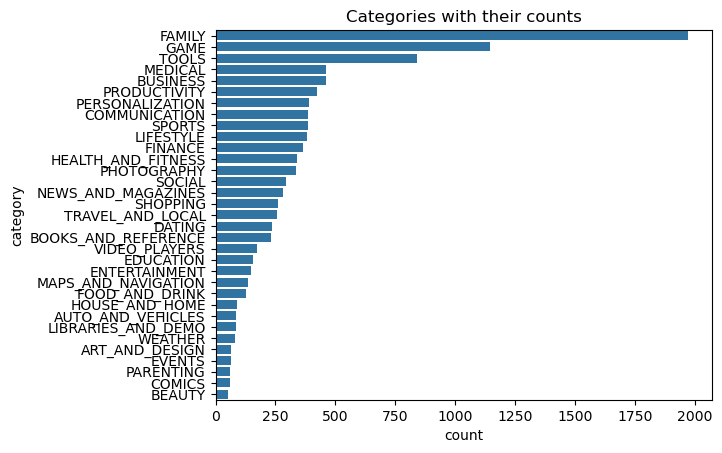

In [11]:
order = df['category'].value_counts().index

sns.countplot(y = "category", data = df, order=order)
plt.title("Categories with their counts")

## rating column

In [12]:
rating_median = df['rating'].median()
df['rating'] = df['rating'].fillna(rating_median)

In [13]:
df.isnull().sum()

app               0
category          0
rating            0
reviews           0
size              0
installs          0
type              1
price             0
content_rating    0
genres            0
last_updated      0
current_ver       8
android_ver       2
dtype: int64

In [14]:
df['rating'].describe()

count    10840.000000
mean         4.206476
std          0.480342
min          1.000000
25%          4.100000
50%          4.300000
75%          4.500000
max          5.000000
Name: rating, dtype: float64

In [15]:
print(df['rating'].dtype)

float64


In [16]:
df["rating"].skew()

-2.0625185561411414

Text(0.5, 1.0, 'Distribution of rating')

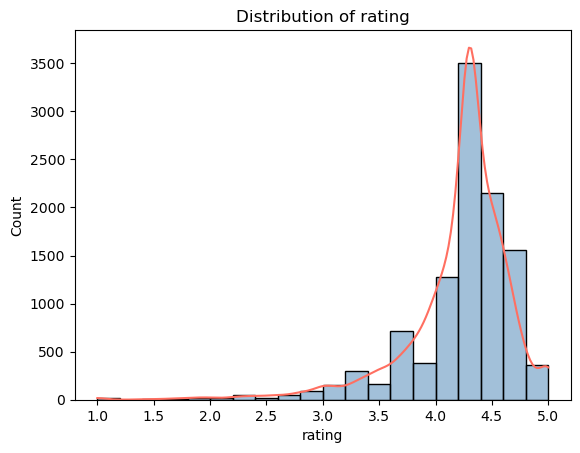

In [17]:
ax = sns.histplot(data=df['rating'], bins=20, kde=True, color='#4682B4')
ax.lines[0].set_color('#FF6F61')
plt.title("Distribution of rating")

In [18]:
# Log transform makes negative skew worse, Yeo-Johnson is a better choice here
from sklearn.preprocessing import PowerTransformer

pt_rating = PowerTransformer(method="yeo-johnson")
df["rating_transformed"] = pt_rating.fit_transform(df[["rating"]])

Text(0.5, 1.0, 'Distribution of ratings (rating_transformed)')

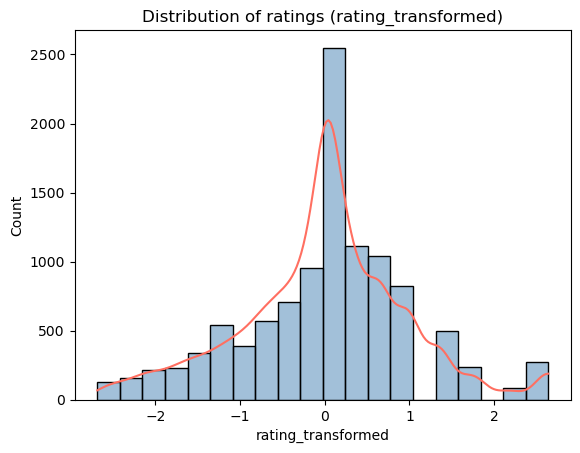

In [19]:
ax = sns.histplot(data=df['rating_transformed'], bins=20, kde=True, color='#4682B4')
ax.lines[0].set_color('#FF6F61')
plt.title("Distribution of ratings (rating_transformed)")

In [20]:
df["rating_transformed"].skew()

-0.005331828101793434

In [21]:
df = df.drop(columns=["rating"])

## reviews column

In [22]:
df["reviews"]

0           159
1           967
2         87510
3        215644
4           967
          ...  
10836        38
10837         4
10838         3
10839       114
10840    398307
Name: reviews, Length: 10840, dtype: object

In [23]:
df["reviews"].describe()

count     10840
unique     6001
top           0
freq        596
Name: reviews, dtype: object

In [24]:
df["reviews"] = df["reviews"].astype('int64')

In [25]:
df["reviews"].dtype

dtype('int64')

In [26]:
df["reviews"].skew()

16.449584335038757

Text(0.5, 1.0, 'Distribution of reviews')

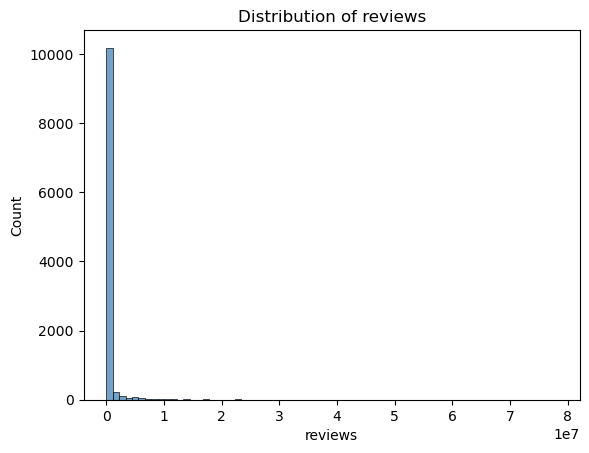

In [27]:
ax = sns.histplot(data=df['reviews'], bins=70, kde=False, color='#4682B4')
# ax.lines[0].set_color('#FF6F61')
plt.title("Distribution of reviews")

In [28]:
df["reviews_log"] = np.log1p(df["reviews"])

In [29]:
df["reviews_log"].skew()

-0.01567309109651736

Text(0.5, 1.0, 'Distribution of reviews (log transformed)')

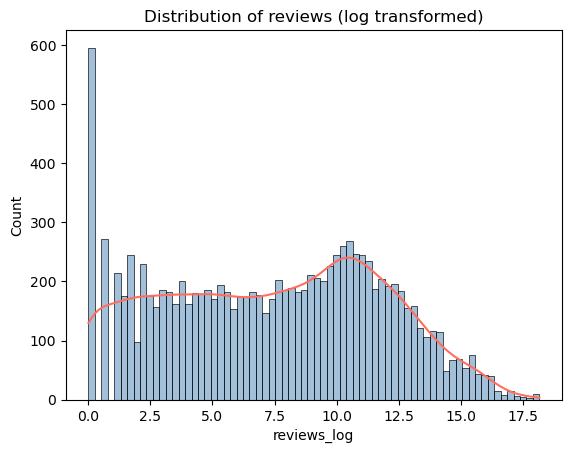

In [30]:
ax = sns.histplot(data=df['reviews_log'], bins=70, kde=True, color='#4682B4')
ax.lines[0].set_color('#FF6F61')
plt.title("Distribution of reviews (log transformed)")

In [31]:
df = df.drop(columns=['reviews'])

## size column

In [32]:
df['size']

0                       19M
1                       14M
2                      8.7M
3                       25M
4                      2.8M
                ...        
10836                   53M
10837                  3.6M
10838                  9.5M
10839    Varies with device
10840                   19M
Name: size, Length: 10840, dtype: object

In [33]:
df['size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [34]:
df['size'].value_counts()

size
Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
                      ... 
430k                     1
429k                     1
200k                     1
460k                     1
619k                     1
Name: count, Length: 461, dtype: int64

#### remove K and M, convert to megabytes, replace 'Varies with device' with median

In [35]:
# Operates on string values in a pandas Series (like the size column) and is designed for string manipulation using regular expressions or simple string replacements.
df["size"] = df["size"].str.replace(r'(\d+\.?\d*)[kK]', lambda x: str(float(x.group(1)) / 1000), regex=True)

# df["column"].replace is typically used to replace entire values in a Series (e.g., replacing "10K" with 0.01). 
# However, when regex=True is used with df["column"].replace, it behaves more like a substring replacement.
df["size"] = df["size"].replace("M","", regex=True)

In [36]:
# Using df["size"] = df["size"].astype('float64') -> could not convert string to float: 'Varies with device'

# convert 'Varies with device' to nan
df["size"] = pd.to_numeric(df["size"], errors='coerce').astype('float64')

In [37]:
size_median = df['size'].median()
df['size'] = df['size'].fillna(size_median)

In [38]:
df['size'].unique()

array([1.90e+01, 1.40e+01, 8.70e+00, 2.50e+01, 2.80e+00, 5.60e+00,
       2.90e+01, 3.30e+01, 3.10e+00, 2.80e+01, 1.20e+01, 2.00e+01,
       2.10e+01, 3.70e+01, 2.70e+00, 5.50e+00, 1.70e+01, 3.90e+01,
       3.10e+01, 4.20e+00, 7.00e+00, 2.30e+01, 6.00e+00, 6.10e+00,
       4.60e+00, 9.20e+00, 5.20e+00, 1.10e+01, 2.40e+01, 1.30e+01,
       9.40e+00, 1.50e+01, 1.00e+01, 1.20e+00, 2.60e+01, 8.00e+00,
       7.90e+00, 5.60e+01, 5.70e+01, 3.50e+01, 5.40e+01, 2.01e-01,
       3.60e+00, 5.70e+00, 8.60e+00, 2.40e+00, 2.70e+01, 2.50e+00,
       1.60e+01, 3.40e+00, 8.90e+00, 3.90e+00, 2.90e+00, 3.80e+01,
       3.20e+01, 5.40e+00, 1.80e+01, 1.10e+00, 2.20e+00, 4.50e+00,
       9.80e+00, 5.20e+01, 9.00e+00, 6.70e+00, 3.00e+01, 2.60e+00,
       7.10e+00, 3.70e+00, 2.20e+01, 7.40e+00, 6.40e+00, 3.20e+00,
       8.20e+00, 9.90e+00, 4.90e+00, 9.50e+00, 5.00e+00, 5.90e+00,
       7.30e+01, 6.80e+00, 3.50e+00, 4.00e+00, 2.30e+00, 7.20e+00,
       2.10e+00, 4.20e+01, 7.30e+00, 9.10e+00, 5.50e+01, 2.30e

In [39]:
df['size'].skew()

1.820801293653534

Text(0.5, 1.0, 'Distribution of size')

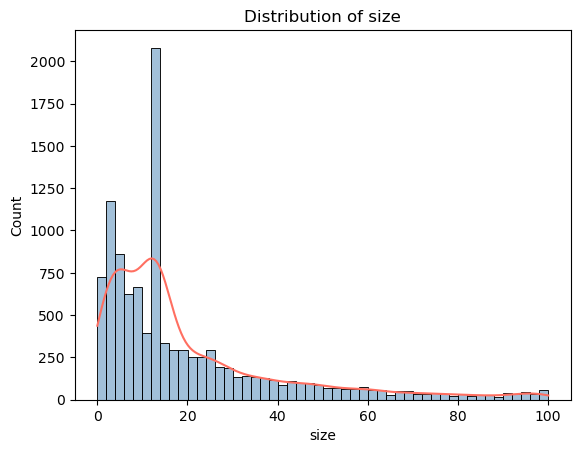

In [40]:
ax = sns.histplot(data=df['size'], bins=50, kde=True, color='#4682B4')
ax.lines[0].set_color('#FF6F61')
plt.title("Distribution of size")

In [41]:
df['size'].skew()

1.820801293653534

In [42]:
# Apply cube root (³√x) transformation to reduce skewness
df["size"] = np.cbrt(df["size"])

In [43]:
df['size'].skew()

0.40756686661018354

Text(0.5, 1.0, 'Distribution of size')

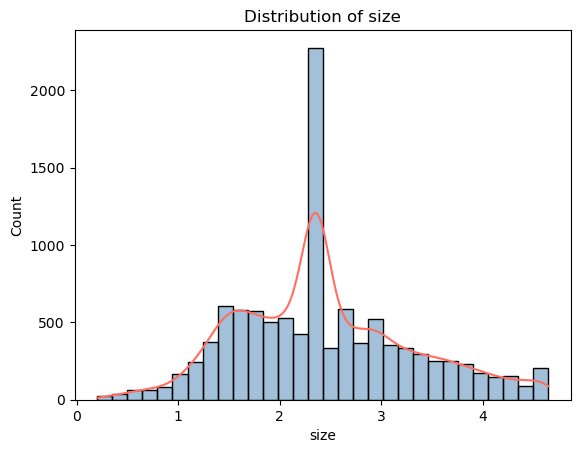

In [44]:
ax = sns.histplot(data=df['size'], bins=30, kde=True, color='#4682B4')
ax.lines[0].set_color('#FF6F61')
plt.title("Distribution of size")

## installs column

In [45]:
df['installs'].value_counts()

installs
1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Name: count, dtype: int64

In [46]:
df['installs'] = df['installs'].replace('0', '0+')

In [47]:
# Use str.replace to remove '+' and ',' inside strings
df['installs'] = df['installs'].str.replace('+', '').str.replace(',', '')

In [48]:
df['installs'].value_counts()

installs
1000000       1579
10000000      1252
100000        1169
10000         1054
1000           907
5000000        752
100            719
500000         539
50000          479
5000           477
100000000      409
10             386
500            330
50000000       289
50             205
5               82
500000000       72
1               67
1000000000      58
0               15
Name: count, dtype: int64

In [49]:
df['installs'] = df['installs'].astype('int64')

In [50]:
df['installs'].skew()

9.572066754928612

In [51]:
df['installs'] = np.log1p(df['installs'])

In [52]:
df['installs'].skew()

-0.3037457807686859

## type column

In [53]:
df['type'].describe()

count     10839
unique        2
top        Free
freq      10039
Name: type, dtype: object

In [54]:
df['type'].value_counts()

type
Free    10039
Paid      800
Name: count, dtype: int64

In [55]:
df['is_paid'] = df['type'].apply(lambda x: 1 if x == 'Paid' else 0)

In [56]:
df = df.drop(columns=['type'])

## price column

In [57]:
df['price'].describe()

count     10840
unique       92
top           0
freq      10040
Name: price, dtype: object

In [58]:
df['price'].value_counts()

price
0         10040
$0.99       148
$2.99       129
$1.99        73
$4.99        72
          ...  
$19.90        1
$1.75         1
$14.00        1
$4.85         1
$1.04         1
Name: count, Length: 92, dtype: int64

In [59]:
# Remove $ and convert to float
df['price'] = df['price'].str.replace('$', '', regex=False).astype('float64')

In [60]:
df['price'].describe()

count    10840.000000
mean         1.027368
std         15.949703
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        400.000000
Name: price, dtype: float64

In [61]:
df['price'].skew()

23.70739237970721

Text(0.5, 1.0, 'Distribution of prices')

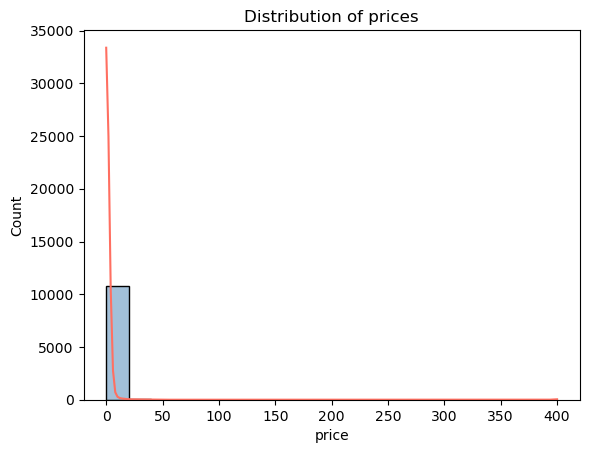

In [62]:
ax = sns.histplot(data=df['price'], bins=20, kde=True, color='#4682B4')
ax.lines[0].set_color('#FF6F61')
plt.title("Distribution of prices")

In [63]:
from scipy.stats import boxcox
df["price_boxcox"], best_lambda = boxcox(df["price"] + 1)  # Automatically selects the optimal λ

Text(0.5, 1.0, 'Distribution of prices (boxcox Transformed)')

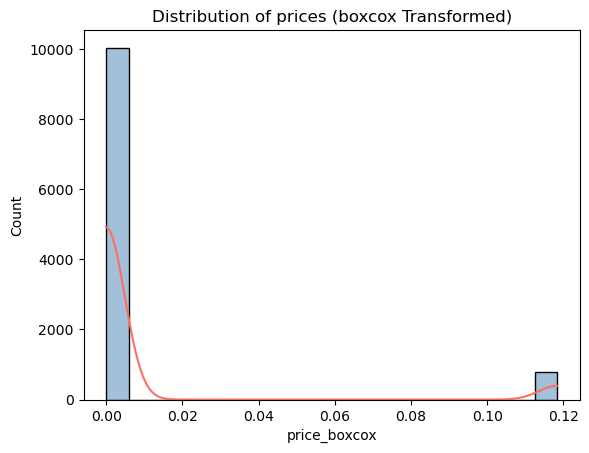

In [64]:
ax = sns.histplot(data=df['price_boxcox'], bins=20, kde=True, color='#4682B4')
ax.lines[0].set_color('#FF6F61')
plt.title("Distribution of prices (boxcox Transformed)")

In [65]:
df['price_boxcox'].skew()

3.2607786914461636

In [66]:
# The skewness in the 'price' column is inherent to the data's nature (many zeros and a few large values).
# We're using the Box-Cox transformation to significantly reduce this skewness, but some remains due to the data's natural distribution.
# For better results, it's more effective to use models that are less sensitive to this residual skewness,
# such as tree-based models like Random Forest or XGBoost.

In [67]:
df = df.drop(columns=['price'])

## content_rating column

In [68]:
df['content_rating'].dtype

dtype('O')

In [69]:
df['content_rating'].value_counts()

content_rating
Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: count, dtype: int64

In [70]:
df['content_rating'] = df['content_rating'].str.lower().str.replace(' ', '_')

In [71]:
# Remove rare content_rating categories: 'Adults only 18+' and 'Unrated'
# Only 5 rows in total, so they don't affect the model much
df = df[~df['content_rating'].isin(['adults_only_18+', 'unrated'])]

In [72]:
df['content_rating'].value_counts()

content_rating
everyone        8714
teen            1208
mature_17+       499
everyone_10+     414
Name: count, dtype: int64

In [73]:
df['content_rating'] = df['content_rating'].replace({
    'mature_17+': 'mature',
    'everyone_10+': 'everyone'
})

In [74]:
df['content_rating'].value_counts()

content_rating
everyone    9128
teen        1208
mature       499
Name: count, dtype: int64

In [75]:
# Note: Ordinal encoding is not used; One-Hot is applied instead
# because the distances between categories are not equal:
# the distance from 'everyone' to 'teen' is not the same as from 'teen' to 'mature'.

ratings_onehot = pd.get_dummies(df['content_rating'], prefix='rating')
df = pd.concat([df, ratings_onehot], axis=1).drop(columns=['content_rating'])

In [76]:
df.sample(5)

,app,category,size,installs,genres,last_updated,current_ver,android_ver,rating_transformed,reviews_log,is_paid,price_boxcox,rating_everyone,rating_mature,rating_teen
3173,"Priceline Hotel Deals, Rental Cars & Flights",TRAVEL_AND_LOCAL,2.466212,15.424949,Travel & Local,"July 26, 2018",4.38.176,4.4 and up,0.331188,10.798166,0,0.0,True,False,False
3073,NCAA March Madness Live,SPORTS,2.668402,15.424949,Sports,"March 30, 2018",7.1.0,5.0 and up,-0.470636,10.437756,0,0.0,True,False,False
10483,New Wallpapers Toyota FJ Cruiser Theme,PERSONALIZATION,2.519842,4.615121,Personalization,"February 23, 2018",1.0,4.1 and up,0.041452,0.693147,0,0.0,False,False,True
3339,WiFi Automatic,TOOLS,2.351335,13.815512,Tools,"March 18, 2018",Varies with device,Varies with device,-0.470636,9.268232,0,0.0,True,False,False
8895,du app,LIFESTYLE,2.924018,13.815512,Lifestyle,"July 24, 2018",3.98,4.2 and up,-1.562730,8.933137,0,0.0,True,False,False


## last_update column

In [77]:
df['last_updated'].describe()

count              10835
unique              1376
top       August 3, 2018
freq                 325
Name: last_updated, dtype: object

In [78]:
# Count how many values of each data type exist in the 'last_updated' column
df["last_updated"].apply(type).value_counts()

last_updated
<class 'str'>    10835
Name: count, dtype: int64

In [79]:
# Use dtype to check column type, describe() to get data statistics
print(df["last_updated"].dtype)

object


In [80]:
df["last_updated"] = pd.to_datetime(df["last_updated"])

In [81]:
print(df["last_updated"].dtype)

datetime64[ns]


## current_version culumn

In [82]:
df['current_ver'].describe()

count                  10827
unique                  2829
top       Varies with device
freq                    1458
Name: current_ver, dtype: object

In [83]:
df['current_ver'].unique

<bound method Series.unique of 0                     1.0.0
1                     2.0.0
2                     1.2.4
3        Varies with device
4                       1.1
                ...        
10836                  1.48
10837                   1.0
10838                   1.0
10839    Varies with device
10840    Varies with device
Name: current_ver, Length: 10835, dtype: object>

In [84]:
df['current_ver'].dtype

dtype('O')

In [85]:
# The 'current_ver' column isn't dropped because version data is critical for predicting ratings.
# It's being transformed into new numeric features (major, minor, and patch versions) so our model can learn how different types of updates impact user satisfaction. 
# We're also creating a separate feature, 'is_varies', to handle the 'Varies with device' rows.

In [86]:
# Create a binary feature to indicate if the version varies with the device.
df['is_varies'] = np.where(df['current_ver'] == 'Varies with device', 1, 0)
print(df[['current_ver', 'is_varies']].head())

          current_ver  is_varies
0               1.0.0          0
1               2.0.0          0
2               1.2.4          0
3  Varies with device          1
4                 1.1          0


In [87]:
# Replace the 'Varies with device' values with an empty string
df['current_ver'] = df['current_ver'].replace('Varies with device', np.nan)
df['current_ver'] = df['current_ver'].fillna('')

In [88]:
# Split the 'current_ver' string and keep only the first three components
version_parts = df['current_ver'].str.split('.', expand=True).iloc[:, :3]

# Rename the columns for clarity
version_parts.columns = ['major_ver', 'minor_ver', 'patch_ver']

# Convert the version columns to numeric, coercing errors to NaN
for col in version_parts.columns:
    version_parts[col] = pd.to_numeric(version_parts[col], errors='coerce').fillna(0).astype(int)

# Concatenate the new version columns with the main dataframe
df = pd.concat([df, version_parts], axis=1)

# Drop the original 'current_ver' column
df = df.drop(columns=['current_ver'])

In [90]:
df.head(100)

,app,category,size,installs,genres,last_updated,android_ver,rating_transformed,reviews_log,is_paid,price_boxcox,rating_everyone,rating_mature,rating_teen,is_varies,major_ver,minor_ver,patch_ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,2.668402,9.210440,Art & Design,2018-01-07,4.0.3 and up,-0.470636,5.075174,0,0.0,True,False,False,0,1,0,0
1,Coloring book moana,ART_AND_DESIGN,2.410142,13.122365,Art & Design;Pretend Play,2018-01-15,4.0.3 and up,-0.902071,6.875232,0,0.0,True,False,False,0,2,0,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,2.056710,15.424949,Art & Design,2018-08-01,4.0.3 and up,1.353273,11.379520,0,0.0,True,False,False,0,1,2,4
3,Sketch - Draw & Paint,ART_AND_DESIGN,2.924018,17.727534,Art & Design,2018-06-08,4.2 and up,0.645353,12.281389,0,0.0,False,False,True,1,0,0,0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,1.409460,11.512935,Art & Design;Creativity,2018-06-20,4.4 and up,0.041452,6.875232,0,0.0,True,False,False,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,All of the parking lot - National Park applica...,AUTO_AND_VEHICLES,2.410142,13.122365,Auto & Vehicles,2018-06-02,4.0 and up,-0.695777,7.470224,0,0.0,True,False,False,0,2,3,4
96,Inquiry Fines and Debits of Vehicles,AUTO_AND_VEHICLES,1.300591,13.122365,Auto & Vehicles,2018-03-20,4.0.3 and up,0.331188,7.893945,0,0.0,True,False,False,0,1,3,0
97,Gas Station,AUTO_AND_VEHICLES,1.650964,11.512935,Auto & Vehicles,2018-04-21,4.0 and up,-0.695777,7.161622,0,0.0,True,False,False,0,2,17,0
98,Hush - Beauty for Everyone,BEAUTY,2.571282,13.122365,Beauty,2018-08-02,5.0 and up,1.353273,9.846970,0,0.0,True,False,False,0,6,10,1
